In [1]:
using Plots

using Unitful
using DimensionfulAngles
using DimensionfulAngles.DefaultSymbols
using LaTeXStrings:@L_str, latexstring

push!(LOAD_PATH, "../src")
using Spectra


[ Info: Precompiling Spectra [9da5bd80-4f3d-48a2-a37e-447dff2ef7bc] (cache misses: include_dependency fsize change (4))

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up
  NOTE: Assumed "AxisArray" refers to `AxisArrays.AxisArray`. This behavior is deprecated and may differ in future versions.`
  NOTE: This behavior may have differed in Julia versions prior to 1.12.
  Hint: If you intended to create a new generic function of the same name, use `function AxisArray end`.
  Hint: To silence the warning, qualify `AxisArray` as `AxisArrays.AxisArray` in the method signature or explicitly `import AxisArrays: AxisArray`.


In [2]:
function Base.show(io::IO, ::MIME"text/plain", s::Spectrum)
    spectrum_size = join(size(s.data), "x")
    spectrum_coord = s.coordinates
    spectrum_unit = Spectra.unit(s, :spectrum)
    axis1_name, axis2_name = Spectra.axesnames(s)
    axis1_unit = Spectra.unit(s, :axis1)
    axis2_unit = Spectra.unit(s, :axis2)
    display(latexstring("$spectrum_size $spectrum_coord spectrum ($spectrum_unit) with axis1 = $axis1_name ($axis1_unit), axis2 = $axis2_name ($axis2_unit)"))
end

In [8]:
Nf = 10
Δf = 0.1Hz
f = (0:Nf-1) * Δf

Nθ = 18
Δθ = 360° / Nθ
θ = (0:Nθ-1) * Δθ

S = Spectrum(abs.(randn(Nf, Nθ) .+ 0.01) * m^2 / Hz / °, f, θ);

In [4]:
var2 = "\\alpha"
x = 10
println(latexstring("$var2 = check($x)"))

$\alpha = check(10)$


In [5]:
var1 = "x"
var2 = "\\alpha"
# Combines two variables into one LaTeX expression
check = "y = $var1 + $var2"  # Using f-string for interpolation
latex_string = L"$check"
println(latex_string)


$check


In [9]:
#Lstring(1m^2 * 2s)
L"1m^2s"

x = 5
L"y = %$x"

spectrum_size = join(size(S.data), "x")
println(isa(spectrum_size, String))
spectrum_coord = S.coordinates
spectrum_unit = Spectra.unit(S, :spectrum)
axis1_name, axis2_name = Spectra.axesnames(S)
axis1_unit = Spectra.unit(S, :axis1)
axis2_unit = Spectra.unit(S, :axis2)
println(latexstring("$spectrum_size $spectrum_coord spectrum ($spectrum_unit) with axis1 = $axis1_name ($axis1_unit), axis2 = $axis2_name ($axis2_unit)"))

true
$10x18 polar spectrum (m^2 °^-1 Hz^-1) with axis1 = frequency (Hz), axis2 = direction (°)$


In [ ]:
S

L"$10x18 polar spectrum (m^2 °^-1 Hz^-1) with axis1 = frequency (Hz), axis2 = direction (°)$"

In [ ]:
display("text/plain", S)

$10x18 polar spectrum (m^2 °^-1 Hz^-1) with axis1 = frequency (Hz), axis2 = direction (°)$



 1.16  1.57  0.9   0.46  0.03  1.2   1.01  1.14  0.06  0.08  0.48  0.48  0.14  0.4   2.29  0.51  0.91  1.28
 1.01  0.86  1.88  1.13  0.8   0.26  0.14  0.98  2.14  0.41  1.03  0.49  0.11  0.26  1.14  0.21  1.37  0.93
 0.41  0.69  1.06  1.69  0.05  1.04  0.06  0.02  0.25  0.1   0.93  1.8   1.22  0.45  0.74  2.57  1.01  0.73
 1.84  0.64  1.01  0.9   0.5   0.34  0.58  0.14  0.48  0.22  0.78  1.92  0.29  0.05  1.01  0.56  0.6   0.55
 1.25  0.19  0.46  0.76  1.11  0.28  2.16  0.02  1.49  0.9   0.6   0.63  0.11  0.87  0.1   0.44  0.91  1.13
 1.2   1.66  0.3   0.86  0.69  0.57  0.05  0.87  0.06  0.26  0.32  0.15  1.22  0.14  1.2   0.02  0.35  2.1
 0.52  0.72  0.26  1.01  1.04  1.42  0.93  0.83  1.27  1.03  1.58  1.34  0.31  0.07  1.53  0.28  0.13  0.71
 0.3   0.76  1.58  1.15  1.54  0.64  0.26  1.24  0.57  0.14  0.2   0.74  0.58  0.09  1.17  0.32  0.07  1.86
 0.44  1.59  1.36  0.53  0.17  2.05  0.69  0.23  0.79  2.37  0.72  0.51  1.3   0.41  1.46  0.37  2.07  0.62
 0.64  0.48  1.2   0.93  0.71

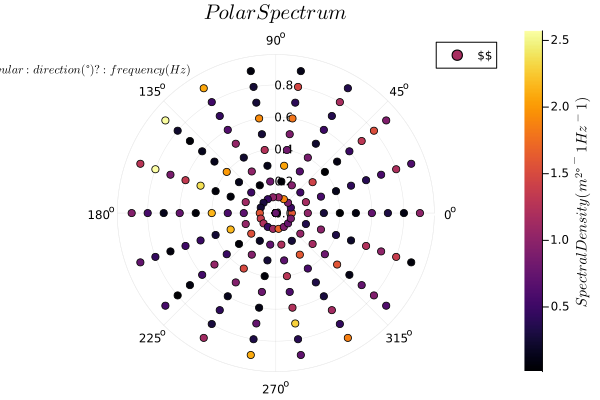

In [ ]:
plot(S)

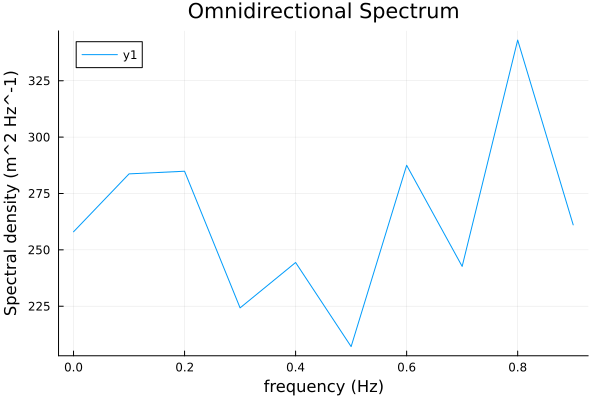

In [ ]:
omni_S = integrate(S, :axis2)
plot(omni_S)